In [1]:
# Installing tensorflow:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



## import libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import os

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input , Lambda
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [11]:
# give dataset path
train_path =r'C:\Users\Admin\leaf_project_image\data\train'
test_path = r'C:\Users\Admin\leaf_project_image\data\test'

In [15]:
# useful for getting number of classes
train_folders = glob(r'C:\Users\Admin\leaf_project_image\data\train\*')
print(len(train_folders))

3


In [18]:
# useful for getting number of classes
test_folders = glob(r'C:\Users\Admin\leaf_project_image\data\test\*')
print(len(test_folders))

3


# 1. Load Dataset:

## Visualizing the Image Data

### 1.Bacterial leaf blight

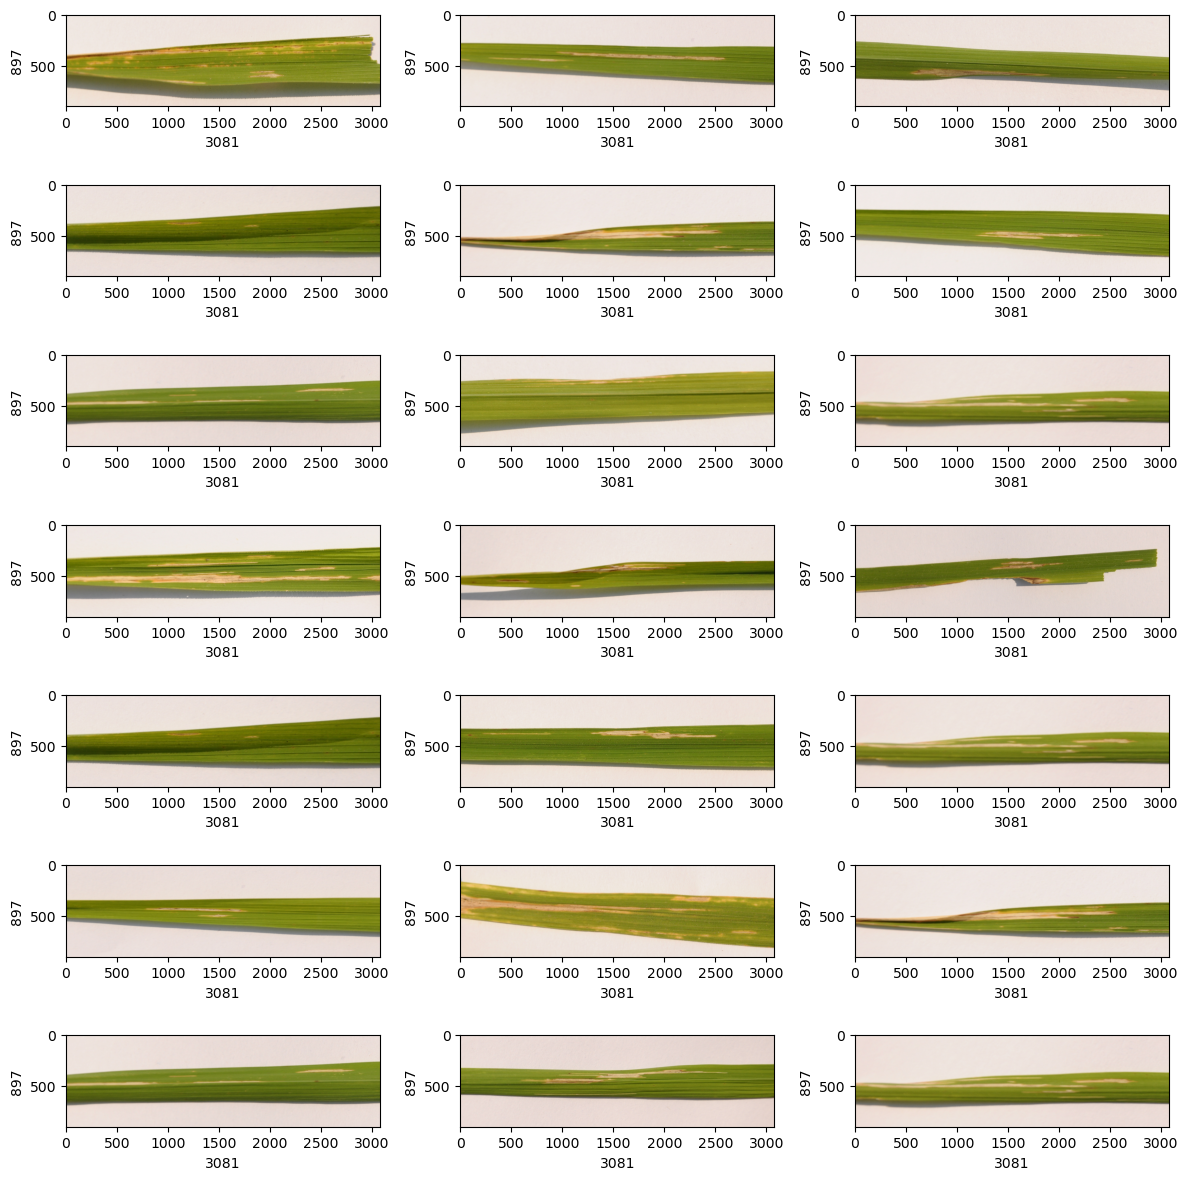

In [19]:
plt.figure(figsize=(12,12))
bacteria_path = r'C:\Users\Admin\leaf_project_image\data\train\Bacterial leaf blight'
for i in range (1, 22):
    plt.subplot(7 ,3, i)
    plt.tight_layout()
    rand_imp = plt.imread(bacteria_path+'/'+random.choice(sorted(os.listdir(bacteria_path))))
    plt.imshow(rand_imp)
    plt.xlabel(rand_imp.shape[1], fontsize = 10) # width of image.
    plt.ylabel(rand_imp.shape[0], fontsize = 10) # height of image.

# 2.Brown spot

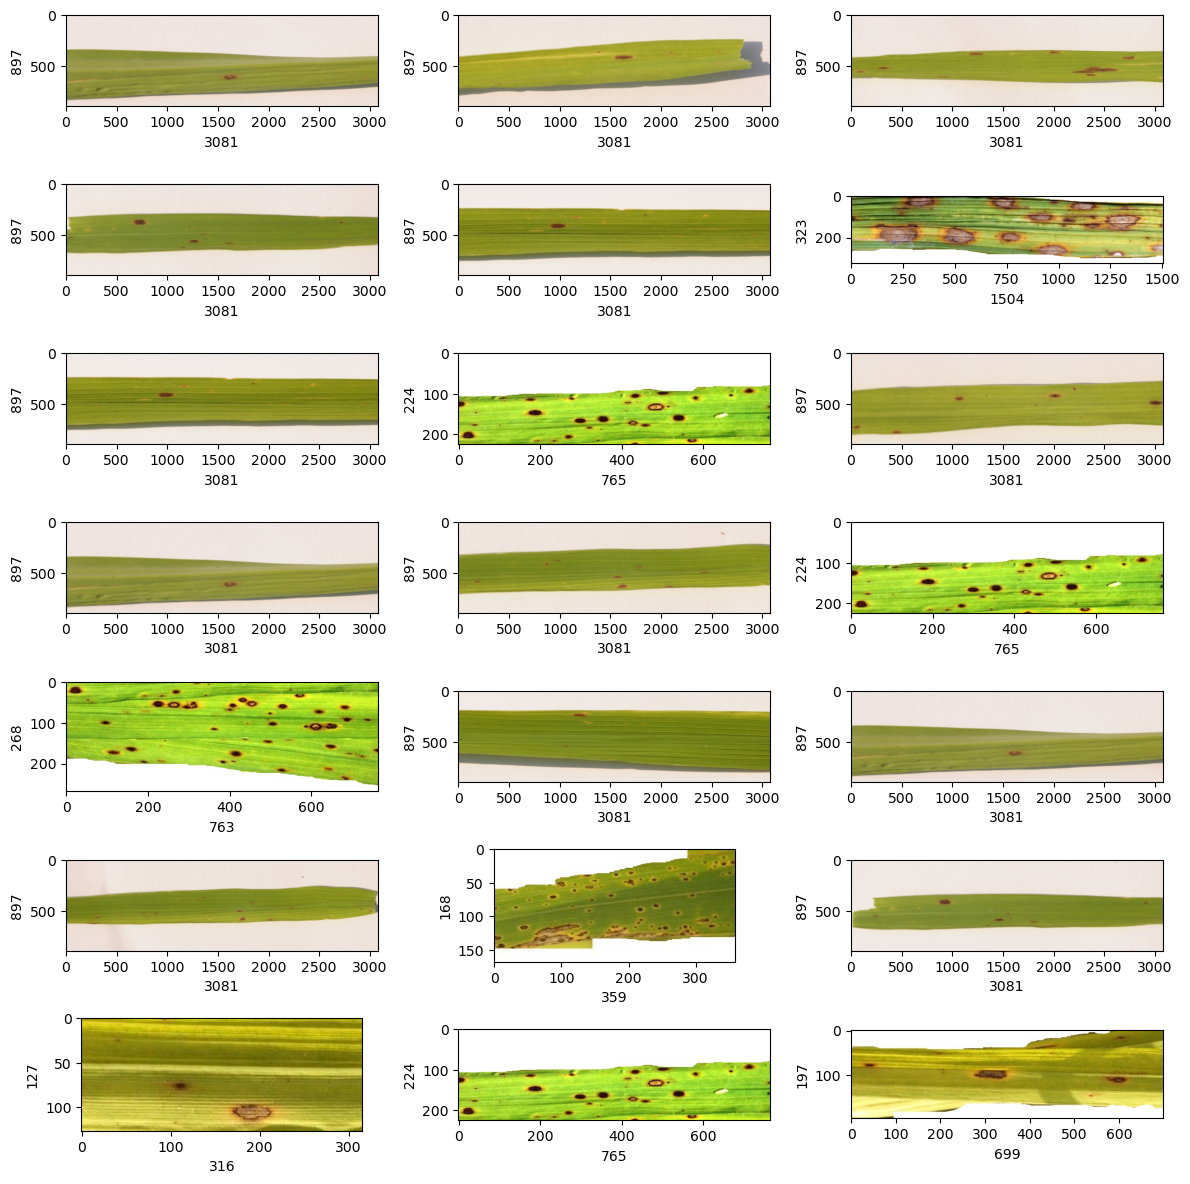

In [20]:
plt.figure(figsize=(12,12))
Brown_Spot = r'C:\Users\Admin\leaf_project_image\data\train\Brown spot'
for i in range (1, 22):
    plt.subplot(7,3,i)
    plt.tight_layout()
    rand_imp = plt.imread(Brown_Spot+'/'+ random.choice(sorted(os.listdir(Brown_Spot))))
    plt.imshow(rand_imp)
    plt.xlabel(rand_imp.shape[1], fontsize = 10) # width of image.
    plt.ylabel(rand_imp.shape[0], fontsize = 10) # height of image.

# 3.Leaf smut

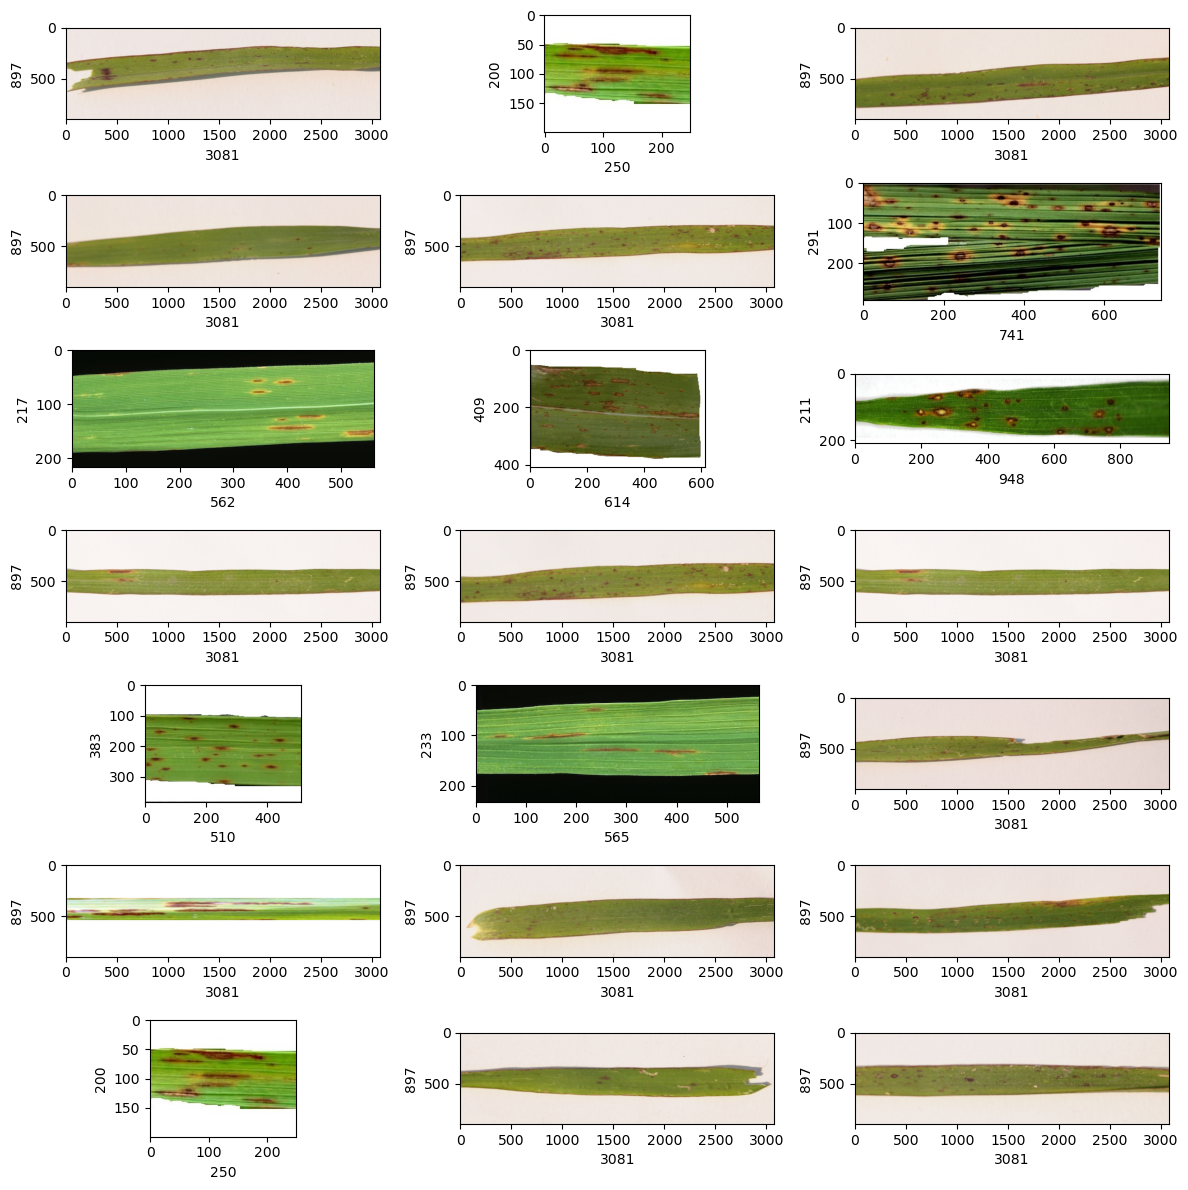

In [21]:
plt.figure(figsize=(12,12))
Leaf_Smut = r'C:\Users\Admin\leaf_project_image\data\train\Leaf smut'
for i in range (1, 22):
    plt.subplot(7,3,i)
    plt.tight_layout()
    rand_imp = plt.imread(Leaf_Smut+'/'+ random.choice(sorted(os.listdir(Leaf_Smut))))
    plt.imshow(rand_imp)
    plt.xlabel(rand_imp.shape[1], fontsize = 10) # width of image.
    plt.ylabel(rand_imp.shape[0], fontsize = 10) # height of image.

In [65]:
train_datagen = ImageDataGenerator(rotation_range=60,
                                  width_shift_range=0.4,
                                  height_shift_range=0.4,
                                  rescale= 1./255,
                                  shear_range=0.4,
                                  zoom_range=0.4,
                                  horizontal_flip=True,
                                  fill_mode= "nearest",
                                  validation_split= .25)
test_datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split=.25)

In [66]:
from tensorflow.keras.utils import img_to_array,array_to_img,load_img

In [67]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define the folder path
brown_spot_folder = r"C:\Users\Admin\leaf_project_image\data\train\Brown spot"

# Get a list of image files in the folder
image_files = [f for f in os.listdir(brown_spot_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

if image_files:
    # Select the first image (or a random one)
    image_path = os.path.join(brown_spot_folder, image_files[0])
    
    # Load the image
    img = load_img(image_path)  # This is a PIL image.
    x = img_to_array(img)  # Convert to Numpy array
    x = x.reshape((1,) + x.shape)  # Reshape for augmentation

    print("✅ Image loaded successfully:", image_path)
else:
    print("❌ No images found in the folder!")


✅ Image loaded successfully: C:\Users\Admin\leaf_project_image\data\train\Brown spot\DSC_0100.jpg


In [68]:
import os

save_dir = r"C:\Users\Admin\leaf_project_image (1)\Image Augmentation Example"

# Create the folder if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  # Creates directory

print("✅ Save directory exists:", save_dir)


✅ Save directory exists: C:\Users\Admin\leaf_project_image (1)\Image Augmentation Example


In [69]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode= "nearest")
img = load_img(r"C:\Users\Admin\leaf_project_image\data\train\Brown spot\DSC_0100.jpg") # This is a PIL image.
x = img_to_array(img) # This is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,)+ x.shape) # This a Numpy array with shape(1, 3, 150, 150)


# The .flow() command below generates batches of randomly transformed images
# and saves the result to the `preview/` directory

i = 0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir=r"C:\Users\Admin\leaf_project_image (1)\Image Augmentation Example", save_prefix="rice_leaf_brown_spot", save_format="jpeg"):
    i += 1
    if i > 20:
        break  # Otherwise the generator would loop indefinitely.


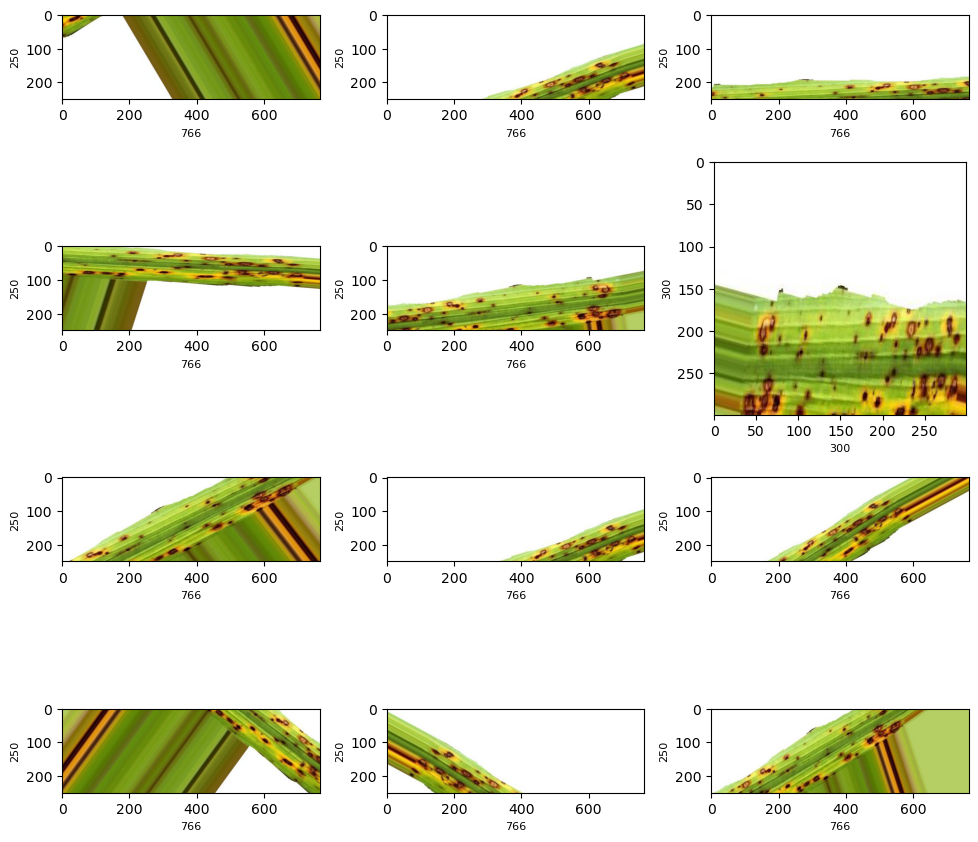

In [70]:
plt.figure(figsize=(10,10))
path = r"C:\Users\Admin\leaf_project_image (1)\Image Augmentation Example"
for i in range(1, 13):
    plt.subplot(4, 3, i)
    plt.tight_layout()
    rand_imp = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_imp)
    plt.xlabel(rand_imp.shape[1], fontsize = 8) # Width of image.
    plt.ylabel(rand_imp.shape[0], fontsize = 8) # Height of image.

In [76]:
training_set = train_datagen.flow_from_directory(r"C:\Users\Admin\leaf_project_image\data\train",
                                                target_size= (256, 256),
                                                batch_size=5,
                                                class_mode='categorical',
                                                subset='training')

Found 90 images belonging to 3 classes.


In [78]:
validation_set = train_datagen.flow_from_directory(r"C:\Users\Admin\leaf_project_image\data\train",
                                                  target_size=(256, 256),
                                                  batch_size=5,
                                                  class_mode= "categorical",
                                                  subset= "validation")

Found 29 images belonging to 3 classes.


In [80]:
# Initialising the CNN model:
model_adam = Sequential()

# First Convolution Layer:
model_adam.add(Conv2D(filters= 16, kernel_size=2, activation="relu", input_shape=[256, 256, 3]))

# First Pooling Layer:
model_adam.add(MaxPooling2D(pool_size=2))

# Second Convolution Layer:
model_adam.add(Conv2D(filters=32, kernel_size=2, activation="relu"))

# Second Pooling Layer:
model_adam.add(MaxPooling2D(pool_size=2))

# Third Convolution Layer:
model_adam.add(Conv2D(filters=32, kernel_size=2 , activation="relu"))

# Third Polling Layer:
model_adam.add(MaxPooling2D(pool_size=2))

# Fourth Convolution Layer:
model_adam.add(Conv2D(filters=64, kernel_size=2, activation="relu"))

# Fourth Pooling Layer:
model_adam.add(MaxPooling2D(pool_size=2))

# Flattening:
model_adam.add(Flatten())


# Fully Connected Layer:
model_adam.add(Dense(128, activation="relu"))
# Deactivating 50% of neuron
model_adam.add(Dropout(0.5))


# Output Layer :
model_adam.add(Dense(3, activation="softmax"))


In [81]:
## Layers
model_adam.layers

[<Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_4, built=True>,
 <Conv2D name=conv2d_5, built=True>,
 <MaxPooling2D name=max_pooling2d_5, built=True>,
 <Conv2D name=conv2d_6, built=True>,
 <MaxPooling2D name=max_pooling2d_6, built=True>,
 <Conv2D name=conv2d_7, built=True>,
 <MaxPooling2D name=max_pooling2d_7, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [82]:
# Summary
model_adam.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 255, 255, 16)        │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 126, 126, 32)        │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 30, 30, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,843,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,858,387 (7.09 MB)

 Trainable params: 1,858,387 (7.09 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                 min_delta=0.0001,
                                                 patience=20,
                                                 verbose=1,
                                                 mode= "auto",
                                                 baseline=None,
                                                 restore_best_weights=False,
                                                 start_from_epoch=0)

In [84]:
early_stopping

In [85]:
from keras.optimizers import Adam

In [86]:
model_adam.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [88]:
history_adam = model_adam.fit(training_set,
                              steps_per_epoch=len(training_set),
                              epochs=150,
                              validation_data=validation_set,
                              validation_steps=len(validation_set))


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 675ms/step - accuracy: 0.2715 - loss: 1.2304 - val_accuracy: 0.3103 - val_loss: 1.1052
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 594ms/step - accuracy: 0.3600 - loss: 1.0973 - val_accuracy: 0.3793 - val_loss: 1.1029
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 593ms/step - accuracy: 0.2983 - loss: 1.0986 - val_accuracy: 0.2414 - val_loss: 1.1021
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 581ms/step - accuracy: 0.3590 - loss: 1.0814 - val_accuracy: 0.3448 - val_loss: 1.2363
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 601ms/step - accuracy: 0.4392 - loss: 1.0465 - val_accuracy: 0.3793 - val_loss: 1.0905
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 596ms/step - accuracy: 0.4807 - loss: 1.0471 - val_accuracy: 0.2759 - val_loss: 1.1357
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 603ms/step - accuracy: 0.3773 - loss: 1.0416 - val_accuracy: 0.2069 - val_loss: 1.1231
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 594ms/step - accuracy: 0.4477 - loss: 1.0246 - 

In [89]:
score_adam = model_adam.evaluate(validation_set, verbose=0)
accuracy_adam = 100*score_adam[1]
print('Accuracy CNN Model with Adam Optimizer:', accuracy_adam)

Accuracy CNN Model with Adam Optimizer: 55.17241358757019


In [90]:
history_adam.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'Model Loss')

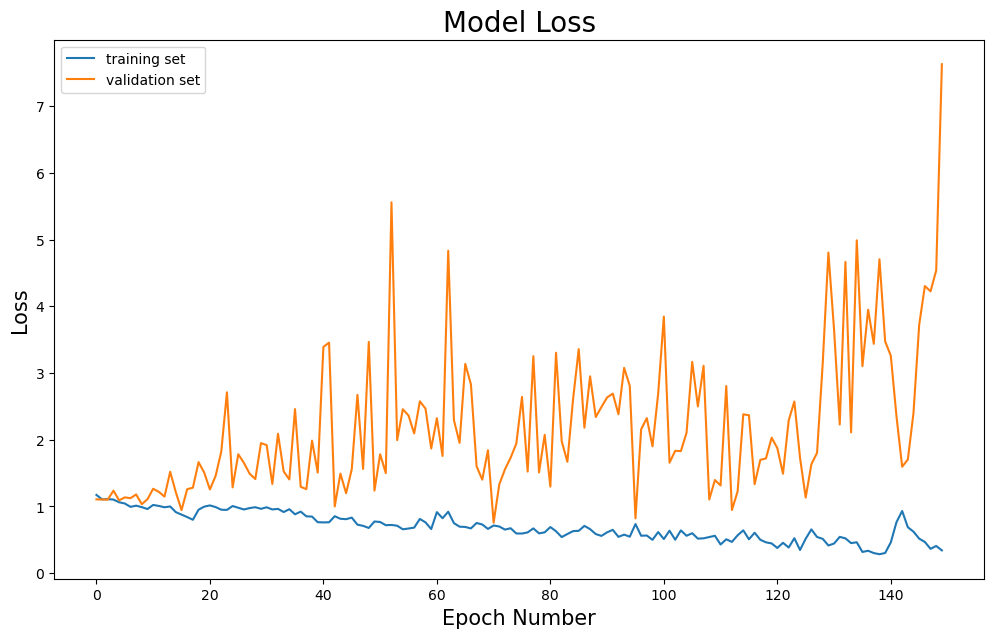

In [91]:
plt.figure(figsize=(12,7))
plt.xlabel("Epoch Number", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.plot(history_adam.history["loss"], label= "training set")
plt.plot(history_adam.history["val_loss"], label= "validation set")
plt.legend()
plt.title("Model Loss", fontsize=20)

Text(0.5, 1.0, 'Model Accuracy')

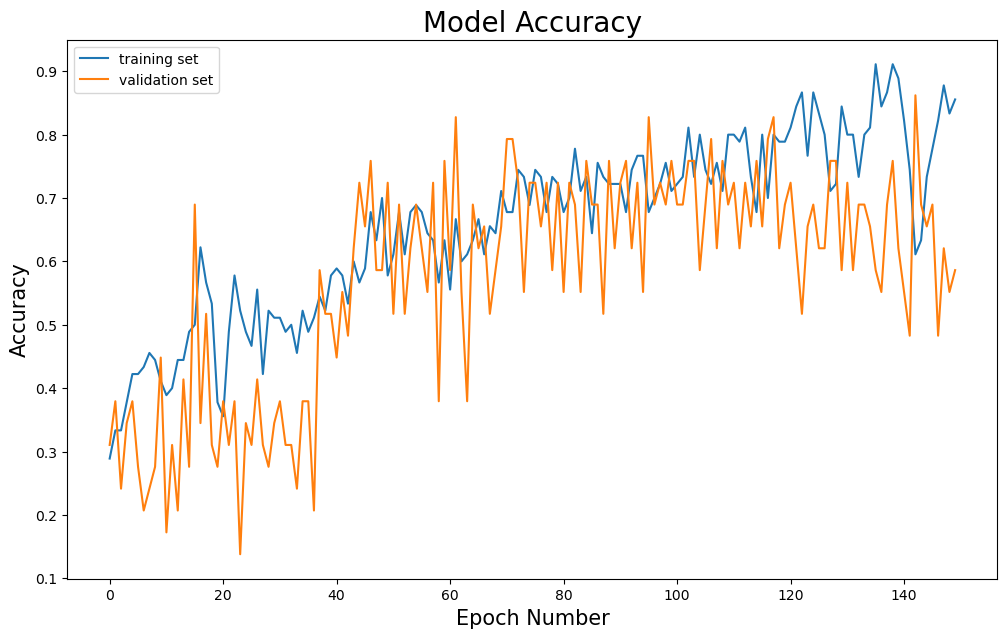

In [92]:
plt.figure(figsize=(12, 7))
plt.xlabel("Epoch Number", fontsize=15)
plt.ylabel("Accuracy", fontsize= 15)
plt.plot(history_adam.history["accuracy"], label = "training set")
plt.plot(history_adam.history["val_accuracy"], label = "validation set")
plt.legend()
plt.title("Model Accuracy", fontsize=20)

In [93]:
# Initialize the CNN model:
model_rms = Sequential()

# First Convolution Layer:
model_rms.add(Conv2D(filters=16, kernel_size=2, activation="relu", input_shape=[256, 256, 3]))

# First Pooling Layer:
model_rms.add(MaxPooling2D(pool_size=2))

# Second Convolution layer:
model_rms.add(Conv2D(filters= 32, kernel_size=2, activation="relu"))

# Second Pooling layer:
model_rms.add(MaxPooling2D(pool_size=2))

# Third Convolution Layer:
model_rms.add(Conv2D(filters= 32, kernel_size=2, activation="relu"))

# Third Pooling layer:
model_rms.add(MaxPooling2D(pool_size=2))

# Fourth Convolution Layer:
model_rms.add(Conv2D(filters=64, kernel_size=2, activation="relu"))

# Fourth Pooling Layer:
model_rms.add(MaxPooling2D(pool_size=2))

# Flattening:
model_rms.add(Flatten())

# Fully Connected Layer:
model_rms.add(Dense(128, activation="relu"))
# Deactivating 50% of neuron
model_rms.add(Dropout(0.5))

# Output Layer:
model_rms.add(Dense(3, activation="softmax"))

In [94]:
# Layers:
model_rms.layers

[<Conv2D name=conv2d_8, built=True>,
 <MaxPooling2D name=max_pooling2d_8, built=True>,
 <Conv2D name=conv2d_9, built=True>,
 <MaxPooling2D name=max_pooling2d_9, built=True>,
 <Conv2D name=conv2d_10, built=True>,
 <MaxPooling2D name=max_pooling2d_10, built=True>,
 <Conv2D name=conv2d_11, built=True>,
 <MaxPooling2D name=max_pooling2d_11, built=True>,
 <Flatten name=flatten_2, built=True>,
 <Dense name=dense_4, built=True>,
 <Dropout name=dropout_2, built=True>,
 <Dense name=dense_5, built=True>]

In [95]:
model_rms.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 255, 255, 16)        │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 62, 62, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 30, 30, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,843,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,858,387 (7.09 MB)

 Trainable params: 1,858,387 (7.09 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model_rms.compile(loss="categorical_crossentropy", optimizer="RMSprop", metrics=["accuracy"])

In [98]:
early_stopping =tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                min_delta=0.0001,
                                                patience=20,
                                                verbose=1,
                                                mode="auto",
                                                baseline=None,
                                                restore_best_weights=False,
                                                start_from_epoch=0)

In [99]:
early_stopping

In [101]:
# Training the Model:
history_rms = model_rms.fit(training_set,
                                      steps_per_epoch=len(training_set),
                                      epochs=150,
                                      validation_data=validation_set,
                                      validation_steps=len(validation_set))

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 687ms/step - accuracy: 0.2982 - loss: 1.7264 - val_accuracy: 0.3103 - val_loss: 1.1501
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 596ms/step - accuracy: 0.2796 - loss: 1.1708 - val_accuracy: 0.4138 - val_loss: 1.1044
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 612ms/step - accuracy: 0.2782 - loss: 1.1034 - val_accuracy: 0.2414 - val_loss: 1.0959
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 592ms/step - accuracy: 0.2744 - loss: 1.1052 - val_accuracy: 0.5862 - val_loss: 1.0772
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 587ms/step - accuracy: 0.4353 - loss: 1.1076 - val_accuracy: 0.4138 - val_loss: 1.1058
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 590ms/step - accuracy: 0.3245 - loss: 1.1141 - val_accuracy: 0.5172 - val_loss: 1.0332
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 586ms/step - accuracy: 0.4035 - loss: 1.0918 - val_accuracy: 0.5172 - val_loss: 1.0108
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 609ms/step - accuracy: 0.4173 - loss: 1.0417 - 

In [102]:
score_rms = model_rms.evaluate(validation_set, verbose=0)
accuracy_rms = 100*score_rms[1]
print("Accuracy CNN Model with RMSprop Optimizer:", accuracy_rms)

Accuracy CNN Model with RMSprop Optimizer: 72.41379022598267


In [103]:
history_rms.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## model loss:

Text(0.5, 1.0, 'Model Loss')

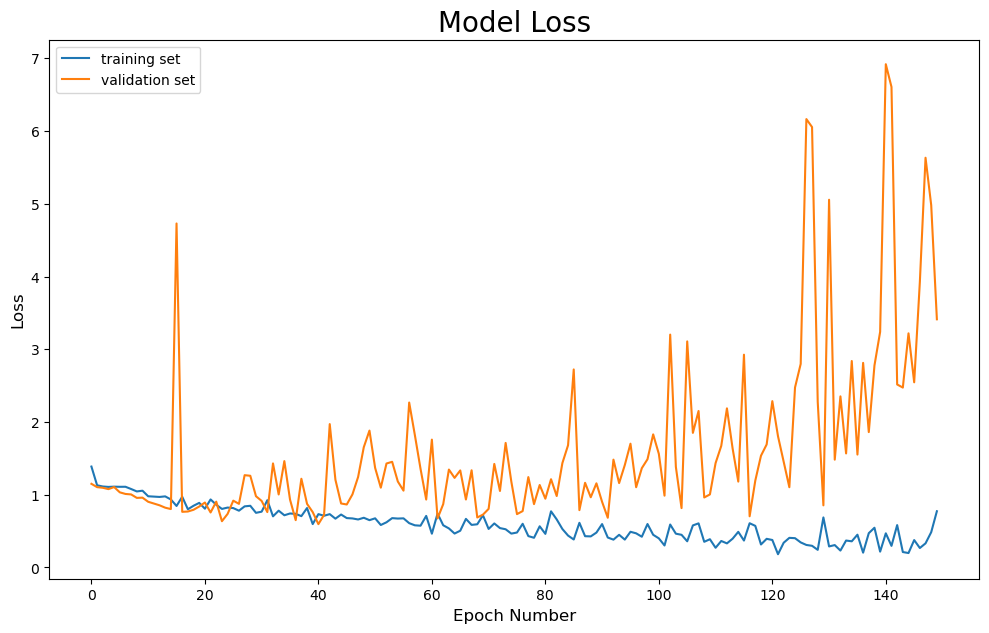

In [114]:
plt.figure(figsize=(12, 7))  # Corrected figsize argument
plt.xlabel("Epoch Number", fontsize=12)  # Fixed function call
plt.ylabel("Loss", fontsize=12)  # Assuming you want to label the y-axis as well
plt.plot(history_rms.history["loss"], label = "training set")
plt.plot(history_rms.history["val_loss"], label = "validation set")
plt.legend()
plt.title("Model Loss", fontsize=20)

Text(0.5, 1.0, 'Model Accuracy')

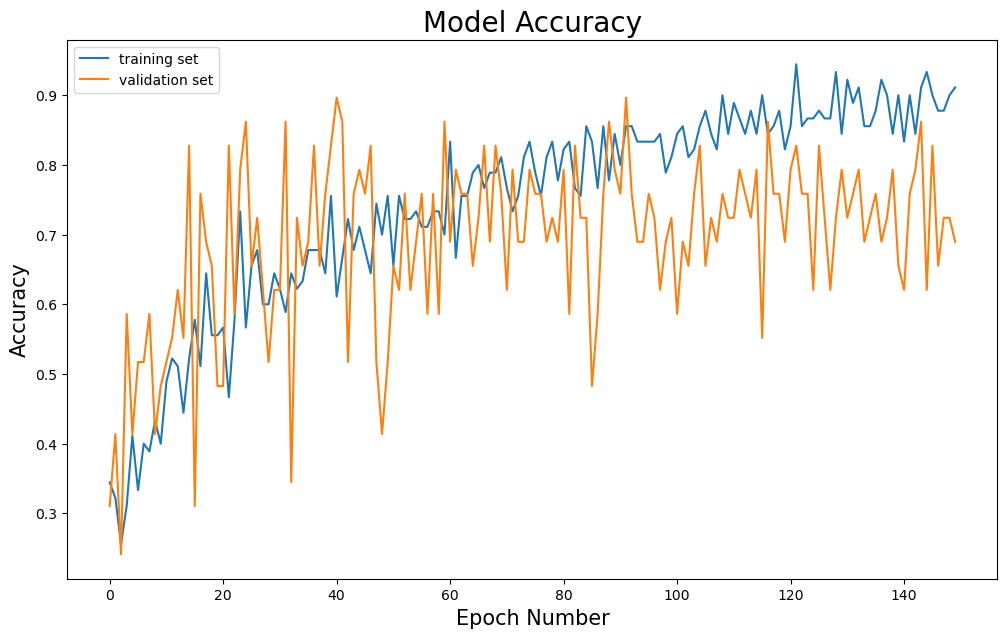

In [107]:
plt.figure(figsize=(12,7))
plt.xlabel("Epoch Number", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.plot(history_rms.history["accuracy"], label ="training set")
plt.plot(history_rms.history["val_accuracy"], label = "validation set")
plt.legend()
plt.title("Model Accuracy", fontsize=20)

# 3. Using SGD as Optimizer:


In [115]:
# Initialize the CNN model:
model_sgd = Sequential()

# First Convolution Layer:
model_sgd.add(Conv2D(filters=16, kernel_size=2, activation="relu", input_shape=[256, 256, 3]))

# First Pooling Layer:
model_sgd.add(MaxPooling2D(pool_size=2))

# Second Convolution layer:
model_sgd.add(Conv2D(filters= 32, kernel_size=2, activation="relu"))

# Second Pooling layer:
model_sgd.add(MaxPooling2D(pool_size=2))

# Third Convolution Layer:
model_sgd.add(Conv2D(filters= 32, kernel_size=2, activation="relu"))

# Third Pooling layer:
model_sgd.add(MaxPooling2D(pool_size=2))

# Fourth Convolution Layer:
model_sgd.add(Conv2D(filters=64, kernel_size=2, activation="relu"))

# Fourth Pooling Layer:
model_sgd.add(MaxPooling2D(pool_size=2))

# Flattening:
model_sgd.add(Flatten())

# Fully Connected Layer:
model_sgd.add(Dense(128, activation="relu"))
# Deactivating 50% of neuron
model_sgd.add(Dropout(0.5))

# Output Layer:
model_sgd.add(Dense(3, activation="softmax"))

In [116]:
# Layers:
model_sgd.layers

[<Conv2D name=conv2d_12, built=True>,
 <MaxPooling2D name=max_pooling2d_12, built=True>,
 <Conv2D name=conv2d_13, built=True>,
 <MaxPooling2D name=max_pooling2d_13, built=True>,
 <Conv2D name=conv2d_14, built=True>,
 <MaxPooling2D name=max_pooling2d_14, built=True>,
 <Conv2D name=conv2d_15, built=True>,
 <MaxPooling2D name=max_pooling2d_15, built=True>,
 <Flatten name=flatten_3, built=True>,
 <Dense name=dense_6, built=True>,
 <Dropout name=dropout_3, built=True>,
 <Dense name=dense_7, built=True>]

In [117]:
model_sgd.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 255, 255, 16)        │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 126, 126, 32)        │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 62, 62, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 30, 30, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,843,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,858,387 (7.09 MB)

 Trainable params: 1,858,387 (7.09 MB)

 Non-trainable params: 0 (0.00 B)

 ## compiling the Model with SGD Optimizer:

In [119]:
from keras.optimizers import SGD

model_sgd.compile(
    loss="categorical_crossentropy",
    optimizer=SGD(),
    metrics=["accuracy"]  # Corrected: list format
)


In [121]:
# Training the Model:
history_sgd = model_sgd.fit(training_set,
                                      steps_per_epoch=len(training_set),
                                      epochs=150,
                                      validation_data=validation_set,
                                      validation_steps=len(validation_set))

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 719ms/step - accuracy: 0.3698 - loss: 1.1112 - val_accuracy: 0.3103 - val_loss: 1.1008
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 597ms/step - accuracy: 0.3984 - loss: 1.0901 - val_accuracy: 0.2759 - val_loss: 1.0983
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 591ms/step - accuracy: 0.2968 - loss: 1.1112 - val_accuracy: 0.2414 - val_loss: 1.1034
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 582ms/step - accuracy: 0.3330 - loss: 1.0999 - val_accuracy: 0.2069 - val_loss: 1.1006
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 632ms/step - accuracy: 0.4989 - loss: 1.0906 - val_accuracy: 0.3793 - val_loss: 1.0955
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 610ms/step - accuracy: 0.2827 - loss: 1.1089 - val_accuracy: 0.3448 - val_loss: 1.0965
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 603ms/step - accuracy: 0.2932 - loss: 1.1102 - val_accuracy: 0.4483 - val_loss: 1.0977
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 644ms/step - accuracy: 0.3892 - loss: 1.0957 - 

In [122]:
score_sgd = model_sgd.evaluate(validation_set, verbose=0)
accuracy_sgd = 100*score_sgd[1]
print("Accuracy CNN Model with SGD Optimizer:", accuracy_sgd)

Accuracy CNN Model with SGD Optimizer: 41.37931168079376


In [123]:
history_sgd.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Model Loss:

Text(0.5, 1.0, 'Model Loss')

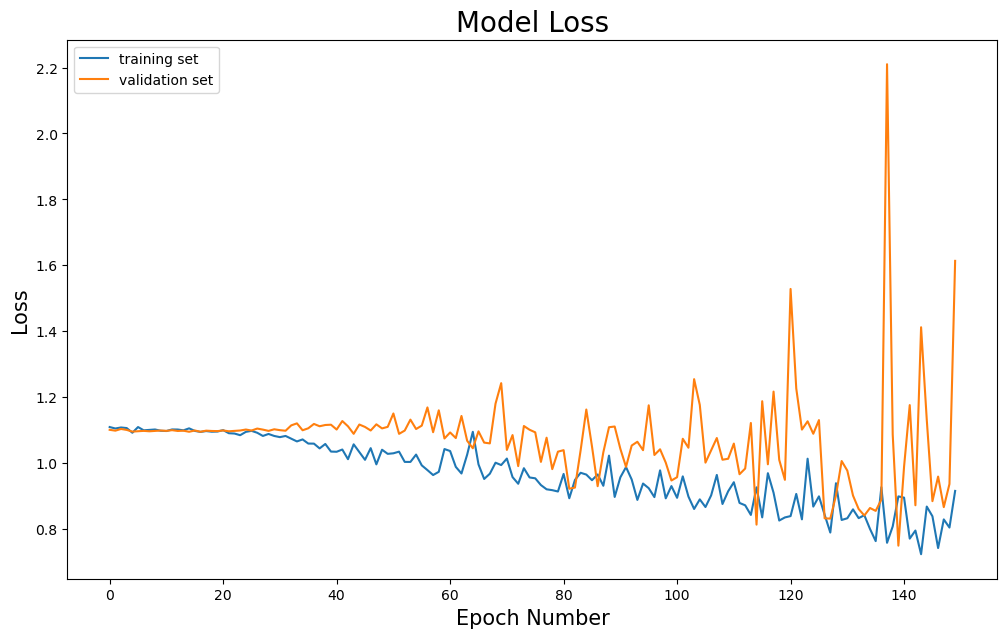

In [124]:
plt.figure(figsize=(12,7))
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.plot(history_sgd.history['loss'], label = 'training set')
plt.plot(history_sgd.history['val_loss'], label = 'validation set')
plt.legend()
plt.title("Model Loss",fontsize=20)

Text(0.5, 1.0, 'Model Accuracy')

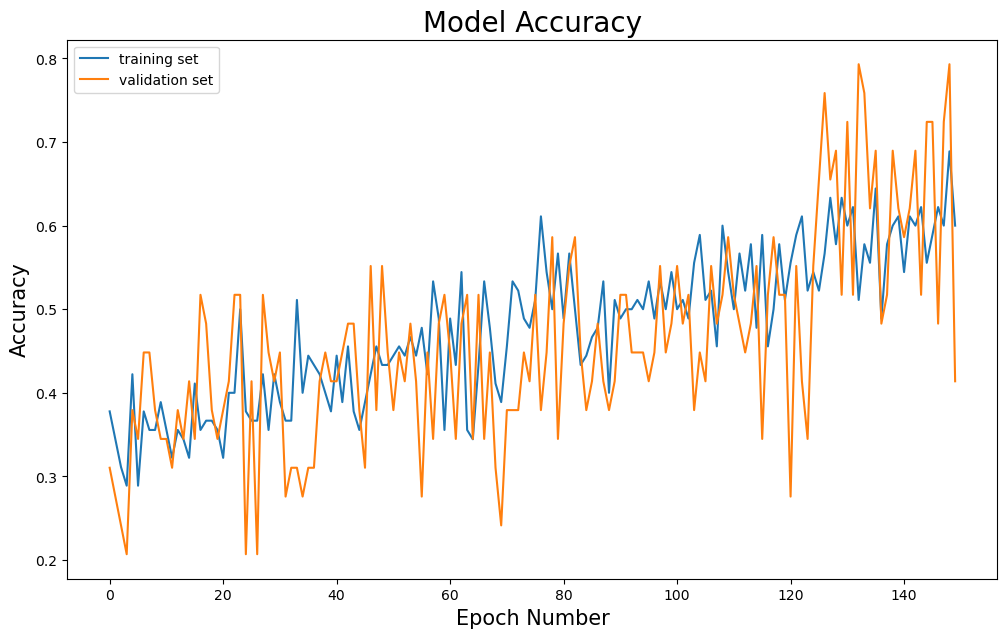

In [125]:
plt.figure(figsize=(12,7))
plt.xlabel("Epoch Number", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.plot(history_sgd.history["accuracy"], label ="training set")
plt.plot(history_sgd.history["val_accuracy"], label = "validation set")
plt.legend()
plt.title("Model Accuracy", fontsize=20)

## 4.Using Adagrad as Optimizer:

In [126]:
# Initialize the CNN model:
model_adagrad = Sequential()

# First Convolution Layer:
model_adagrad.add(Conv2D(filters=16, kernel_size=2, activation="relu", input_shape=[256, 256, 3]))

# First Pooling Layer:
model_adagrad.add(MaxPooling2D(pool_size=2))

# Second Convolution layer:
model_adagrad.add(Conv2D(filters= 32, kernel_size=2, activation="relu"))

# Second Pooling layer:
model_adagrad.add(MaxPooling2D(pool_size=2))

# Third Convolution Layer:
model_adagrad.add(Conv2D(filters= 32, kernel_size=2, activation="relu"))

# Third Pooling layer:
model_adagrad.add(MaxPooling2D(pool_size=2))

# Fourth Convolution Layer:
model_adagrad.add(Conv2D(filters=64, kernel_size=2, activation="relu"))

# Fourth Pooling Layer:
model_adagrad.add(MaxPooling2D(pool_size=2))

# Flattening:
model_adagrad.add(Flatten())

# Fully Connected Layer:
model_adagrad.add(Dense(128, activation="relu"))
# Deactivating 50% of neuron
model_adagrad.add(Dropout(0.5))

# Output Layer:
model_adagrad.add(Dense(3, activation="softmax"))

In [127]:
# Layers:
model_adagrad.layers

[<Conv2D name=conv2d_16, built=True>,
 <MaxPooling2D name=max_pooling2d_16, built=True>,
 <Conv2D name=conv2d_17, built=True>,
 <MaxPooling2D name=max_pooling2d_17, built=True>,
 <Conv2D name=conv2d_18, built=True>,
 <MaxPooling2D name=max_pooling2d_18, built=True>,
 <Conv2D name=conv2d_19, built=True>,
 <MaxPooling2D name=max_pooling2d_19, built=True>,
 <Flatten name=flatten_4, built=True>,
 <Dense name=dense_8, built=True>,
 <Dropout name=dropout_4, built=True>,
 <Dense name=dense_9, built=True>]

In [128]:
model_adagrad.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 255, 255, 16)        │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 126, 126, 32)        │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 62, 62, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 30, 30, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,843,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,858,387 (7.09 MB)

 Trainable params: 1,858,387 (7.09 MB)

 Non-trainable params: 0 (0.00 B)

 ## compiling the Model with Adagrad Optimizer:

In [133]:
from keras.optimizers import Adagrad
model_adagrad.compile(loss= "categorical_crossentropy", optimizer = Adagrad(), metrics=["accuracy"])

In [134]:
# Training the Model:
history_adagrad = model_adagrad.fit(training_set,
                                      steps_per_epoch=len(training_set),
                                      epochs=150,
                                      validation_data=validation_set,
                                      validation_steps=len(validation_set))

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 462ms/step - accuracy: 0.3795 - loss: 1.0988 - val_accuracy: 0.3793 - val_loss: 1.1046
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 395ms/step - accuracy: 0.2946 - loss: 1.1214 - val_accuracy: 0.3448 - val_loss: 1.0931
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 396ms/step - accuracy: 0.2788 - loss: 1.1282 - val_accuracy: 0.3448 - val_loss: 1.0869
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 380ms/step - accuracy: 0.3790 - loss: 1.0965 - val_accuracy: 0.3448 - val_loss: 1.0878
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 399ms/step - accuracy: 0.3336 - loss: 1.0890 - val_accuracy: 0.3448 - val_loss: 1.1018
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 391ms/step - accuracy: 0.3564 - loss: 1.0616 - val_accuracy: 0.3103 - val_loss: 1.0983
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 376ms/step - accuracy: 0.4443 - loss: 1.0904 - val_accuracy: 0.3793 - val_loss: 1.0942
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 371ms/step - accuracy: 0.2991 - loss: 1.0909 - val_acc

In [135]:
score_adagrad = model_adagrad.evaluate(validation_set, verbose=0)
accuracy_adagrad = 100*score_adagrad[1]
print("Accuracy CNN Model with Adagrad Optimizer:", accuracy_adagrad)

Accuracy CNN Model with Adagrad Optimizer: 51.724135875701904


In [136]:
history_adagrad.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Model Loss:

Text(0.5, 1.0, 'Model Loss')

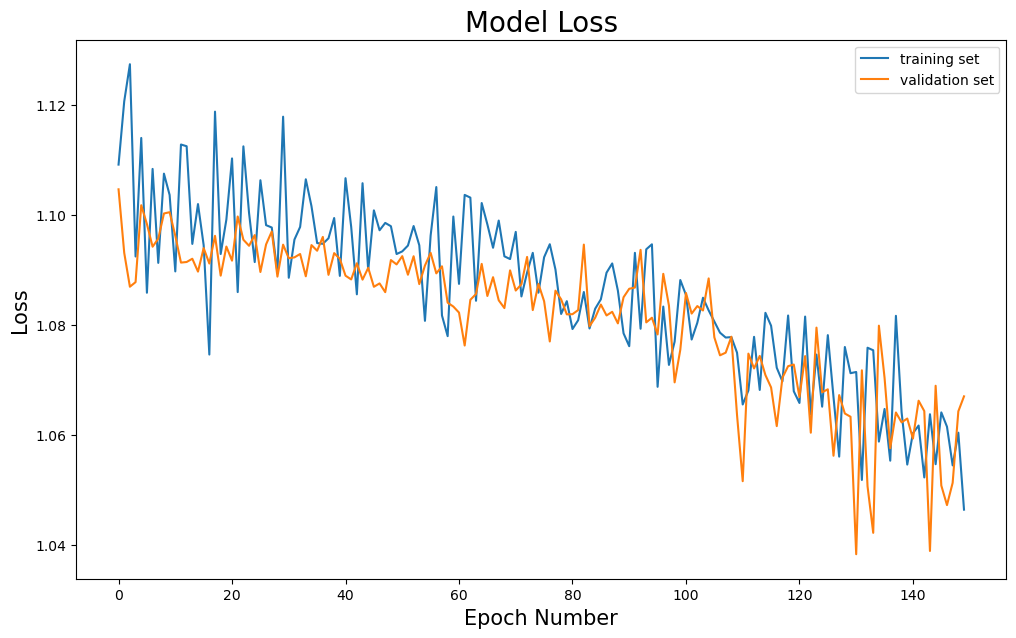

In [137]:
plt.figure(figsize=(12,7))
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.plot(history_adagrad.history['loss'], label = 'training set')
plt.plot(history_adagrad.history['val_loss'], label = 'validation set')
plt.legend()
plt.title("Model Loss",fontsize=20)

## Model Accuracy:

Text(0.5, 1.0, 'Model Accuracy')

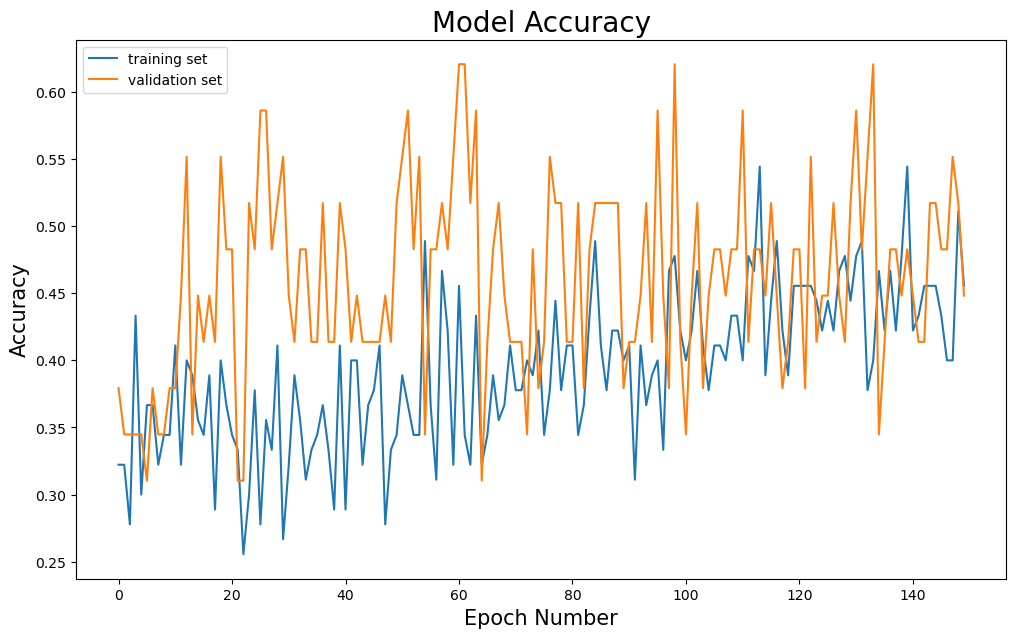

In [138]:
plt.figure(figsize=(12,7))
plt.xlabel("Epoch Number", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.plot(history_adagrad.history["accuracy"], label ="training set")
plt.plot(history_adagrad.history["val_accuracy"], label = "validation set")
plt.legend()
plt.title("Model Accuracy", fontsize=20)

# RESULT:

## Comparing the optimizers for the best accuracy:

In [139]:
accuracy = [accuracy_adam,accuracy_rms,accuracy_sgd,accuracy_adagrad]
optimizers = ["ADAM","RMSprop","SGD","ADAGRAD"]

for i in range(len(optimizers)):
    print("The acuuracy achieved using "+optimizers[i]+" is: "+str(accuracy[i])+" %")

The acuuracy achieved using ADAM is: 55.17241358757019 %
The acuuracy achieved using RMSprop is: 72.41379022598267 %
The acuuracy achieved using SGD is: 41.37931168079376 %
The acuuracy achieved using ADAGRAD is: 51.724135875701904 %


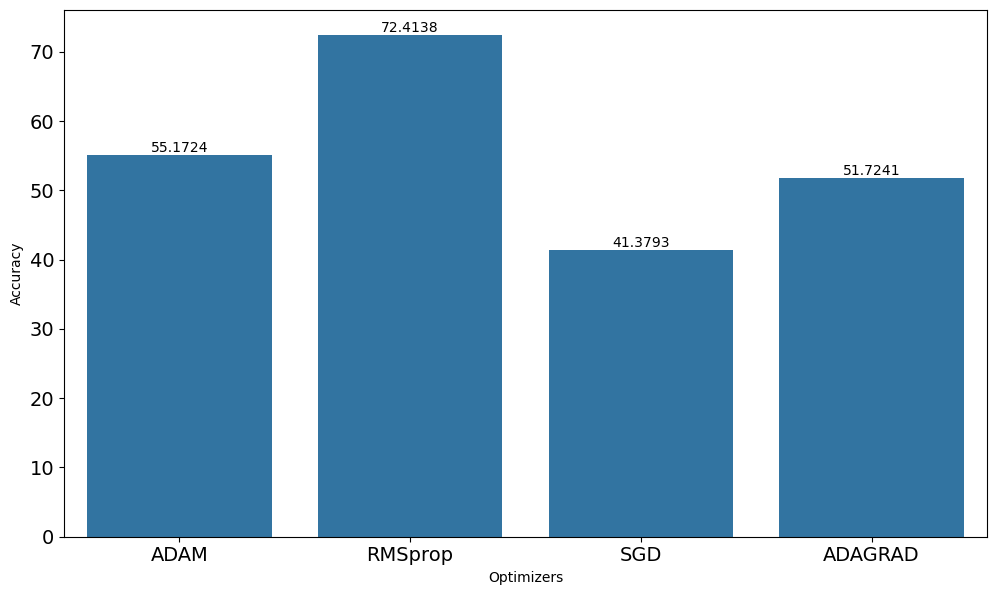

In [140]:
plt.figure(figsize=(10,6))
plt.xlabel("Optimizers")
plt.ylabel("Accuracy")
ax = sns.barplot(x=optimizers, y=accuracy)
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.tick_params(labelsize=14)